# Vecindarios de Toronto

Se usa un marco de datos antiguo de wikipedia adecuado para su interpretación

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_toronto = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1008658788') # enlace a antigua versión de datos
df_toronto = df_toronto[0]
df_toronto.head(5)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [122]:
df_toronto.shape

(180, 3)

In [123]:
# eliminar Not assigned
df_toronto = df_toronto[df_toronto['Borough']!= 'Not assigned']
df_toronto = df_toronto.reset_index(drop=True)
df_toronto.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [124]:
df_toronto = df_toronto[df_toronto['Neighbourhood']!= 'Not assigned']
df_toronto.head(5)

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


Tamaño final del Dataframe es de 103 filas y 3 columnas

In [125]:
df_toronto.shape

(103, 3)

# Vecindarios de toronto 2

In [126]:
postal_code = df_toronto['Postal Code']
postal_code

0      M3A
1      M4A
2      M5A
3      M6A
4      M7A
      ... 
98     M8X
99     M4Y
100    M7Y
101    M8Y
102    M8Z
Name: Postal Code, Length: 103, dtype: object

In [127]:
!pip install geocoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
'''
import geocoder # import geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]
'''

"\nimport geocoder # import geocoder\n\n# initialize your variable to None\nlat_lng_coords = None\n\n# loop until you get the coordinates\nwhile(lat_lng_coords is None):\n  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))\n  lat_lng_coords = g.latlng\n\nlatitude = lat_lng_coords[0]\nlongitude = lat_lng_coords[1]\n"

El método anterior no funcionó, probando con otro método

In [129]:
url = (r'https://raw.githubusercontent.com/R3gm/Coursera_Capstone-/main/Geospatial_Coordinates.csv')
latlog = pd.read_csv(url)
latlog.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [130]:
latlog.shape

(103, 3)

In [131]:
# uniendo los df
df_t = pd.merge(df_toronto, latlog)
df_t

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


# Vecindarios de toronto 3

Revisamos cuantos vecindarios existen por Municipio

In [132]:
df_t_g = df_t.groupby(['Borough']).size().reset_index(name='Neighbourhood').sort_values(by='Neighbourhood', ascending= False)
df_t_g

,Borough,Neighbourhood
6,North York,24
1,Downtown Toronto,19
7,Scarborough,17
4,Etobicoke,12
0,Central Toronto,9
8,West Toronto,6
2,East Toronto,5
3,East York,5
9,York,5
5,Mississauga,1


Ubicamos el mapa en Toronto con los diferentes marcadores de vecindarios

In [133]:
import folium

lat = 43.651070
log = -79.347015

world_map = folium.Map(location=[lat, log], zoom_start=11, # location= se pasa la latitud y longitud [0,0] #zomm_start= acercamiento zoom
                       tiles='Stamen Terrain' ) # estilo de mapa muy útil

# procese los 100 delitos y agregue cada uno de ellos al mapa # df_incidents.Category define el label para cada dato en el mapa
for lat, lng, borough, neighborhood in zip(df_t['Latitude'], df_t['Longitude'],df_t['Borough'], df_t['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # defina de qué tamaño desea que sean los marcadores de círculo
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(world_map)

# muestre el mapa
world_map

## Captura de pantalla para poder visualizar el mapa en github

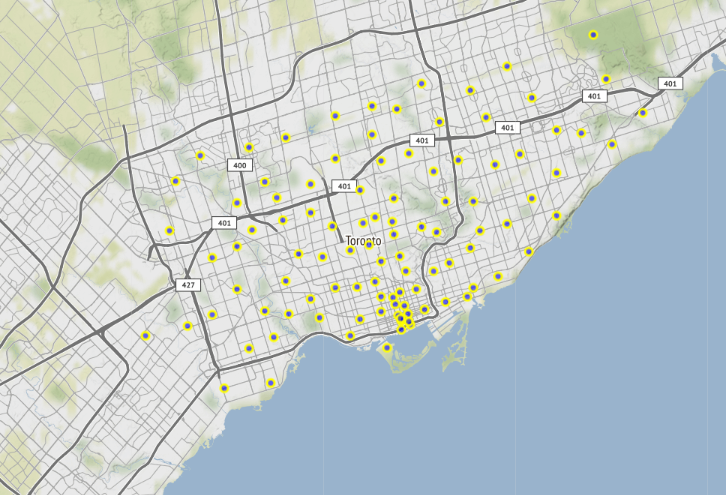

# Mapa con datos de vecindarios agrupados

In [134]:
from folium import plugins

rt = folium.Map(location=[lat, log], zoom_start=10.5)

a = plugins.MarkerCluster().add_to(rt)

# procese el DataFrame 
for lat, lng, borough, neighborhood in zip(df_t['Latitude'], df_t['Longitude'],df_t['Borough'], df_t['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(a)

# muestre el mapa
rt

## Captura de pantalla para poder visualizar el mapa en github

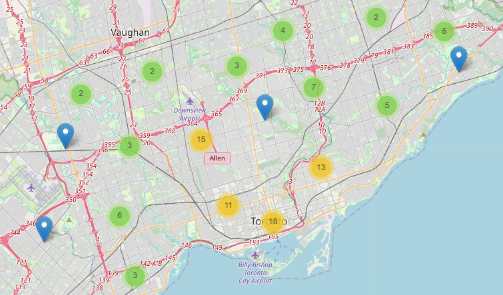